In [20]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, Add, Conv2D, DepthwiseConv2D, SeparableConv2D
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, ZeroPadding2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Activation, LeakyReLU
import keras.backend as K
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
from time import time
import numpy as np

In [9]:
from tensorflow.keras.utils import plot_model

In [10]:
input_shape = 224, 224, 3
n_classes = 1000

# AlexNet

In [11]:
def alexnet(input_shape, n_classes):
    input = Input(input_shape)
    x = Conv2D(96, 11, strides=4, padding="same", activation="relu")(input)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)

    x = Conv2D(256, 5, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)

    x = Conv2D(384, 3, strides=1, padding="same", activation="relu")(x)

    x = Conv2D(384, 3, strides=1, padding="same", activation="relu")(x)

    x = Conv2D(256, 3, strides=1, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)

    x = Flatten()(x)
    x = Dense(4096, activation="relu")(x)
    x = Dense(4096, activation="relu")(x)

    output = Dense(n_classes, activation="softmax")(x)

    model = Model(input, output)
    return model


model = alexnet(input_shape, n_classes)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 96)        34944     
                                                                 
 batch_normalization_3 (Bat  (None, 56, 56, 96)        384       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_4 (Bat  (None, 27, 27, 256)       1024

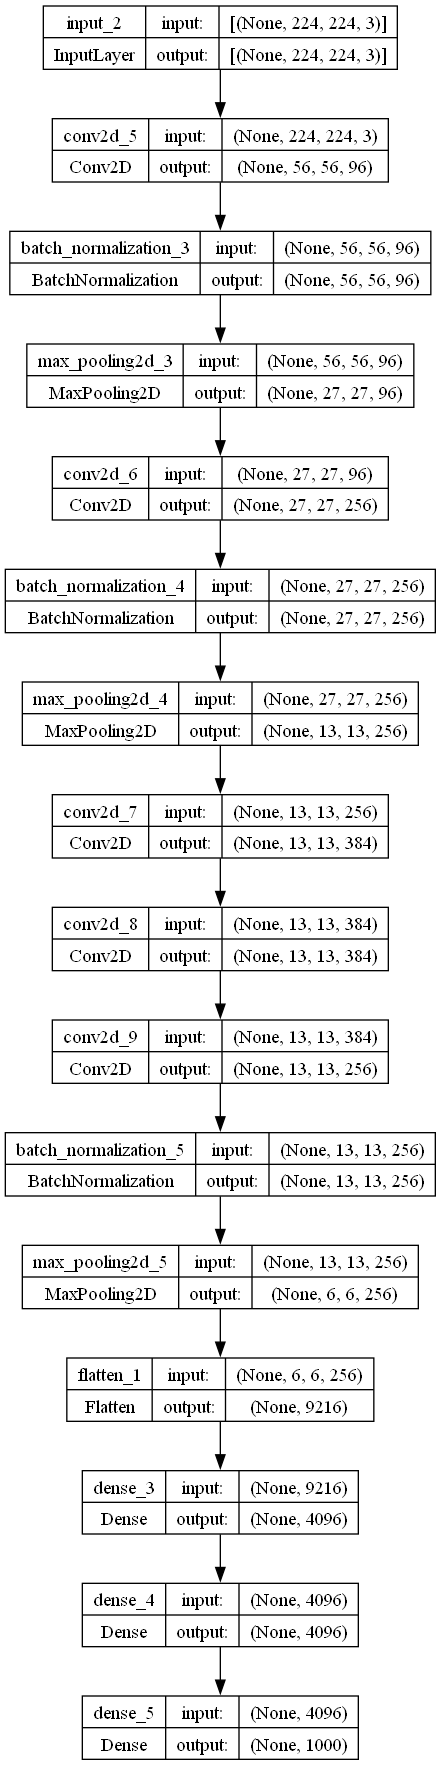

In [12]:
plot_model(model, to_file='alexnet.png', show_shapes=True, show_layer_names=True)


# VGG16

In [13]:
def vgg16(input_shape, n_classes):

    input = Input(input_shape)

    x = Conv2D(64, 3, padding="same", activation="relu")(input)
    x = Conv2D(64, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(128, 3, padding="same", activation="relu")(x)
    x = Conv2D(128, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(256, 3, padding="same", activation="relu")(x)
    x = Conv2D(256, 3, padding="same", activation="relu")(x)
    x = Conv2D(256, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Flatten()(x)
    x = Dense(4096, activation="relu")(x)
    x = Dense(4096, activation="relu")(x)

    output = Dense(n_classes, activation="softmax")(x)

    model = Model(input, output)
    return model


model = vgg16(input_shape, n_classes)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_11 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 128)     147584    
                                                           

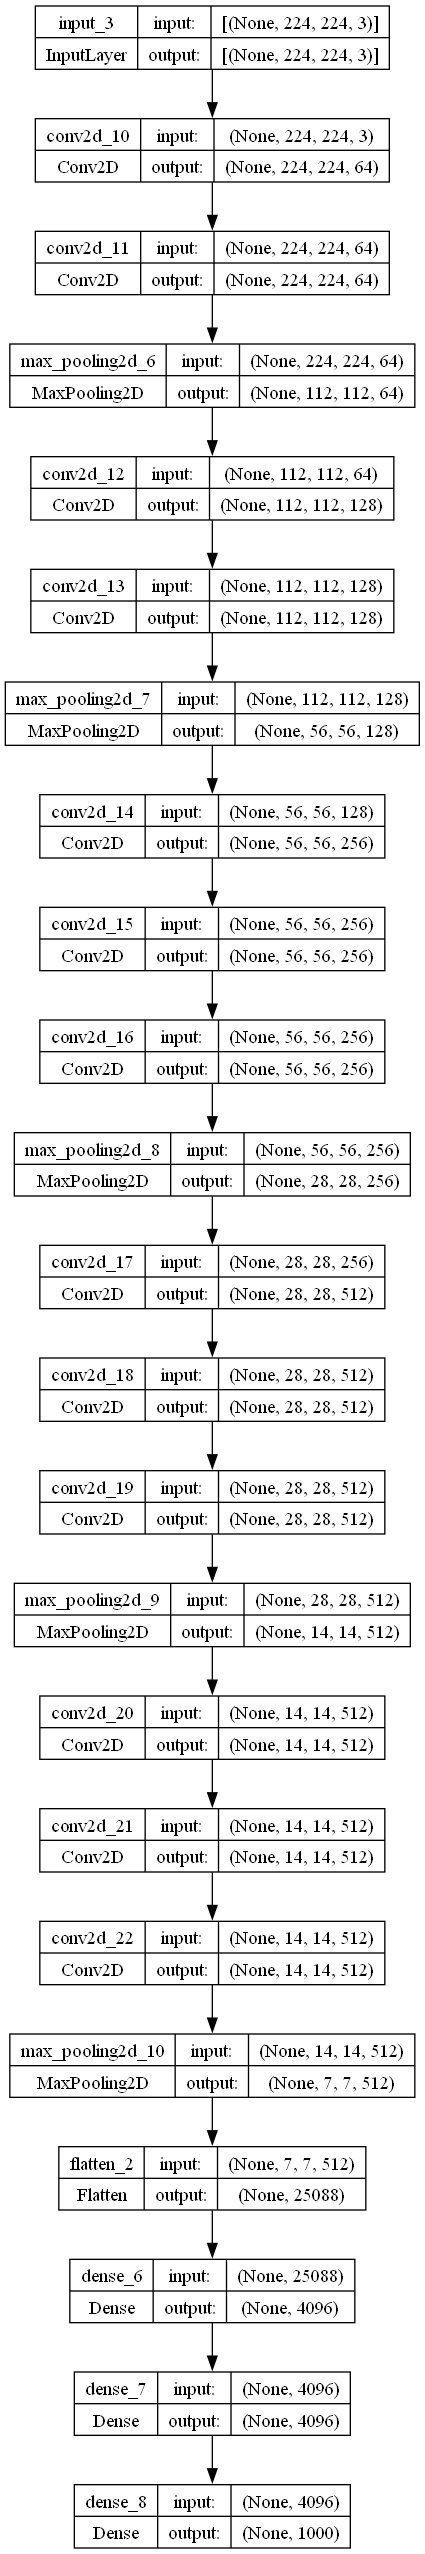

In [14]:
plot_model(model, to_file='vgg16.png', show_shapes=True, show_layer_names=True)


# VGG19

In [15]:
def vgg19(input_shape, n_classes):
    input = Input(input_shape)

    x = Conv2D(64, 3, padding="same", activation="relu")(input)
    x = Conv2D(64, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(128, 3, padding="same", activation="relu")(x)
    x = Conv2D(128, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(256, 3, padding="same", activation="relu")(x)
    x = Conv2D(256, 3, padding="same", activation="relu")(x)
    x = Conv2D(256, 3, padding="same", activation="relu")(x)
    x = Conv2D(256, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Flatten()(x)
    x = Dense(4096, activation="relu")(x)
    x = Dense(4096, activation="relu")(x)

    output = Dense(n_classes, activation="softmax")(x)

    model = Model(input, output)
    return model

model = vgg19(input_shape, n_classes)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_23 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_24 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_26 (Conv2D)          (None, 112, 112, 128)     147584    
                                                           

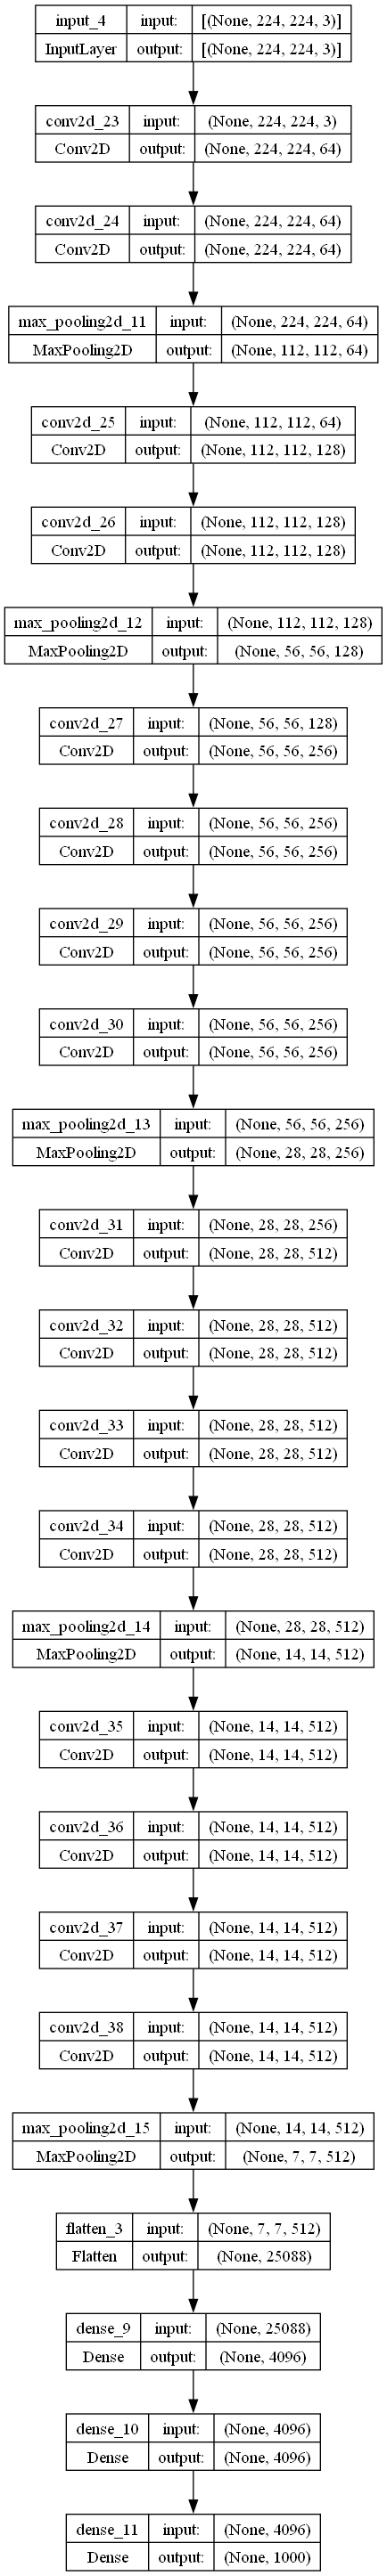

In [16]:
plot_model(model, to_file='vgg19.png', show_shapes=True, show_layer_names=True)


# DenseNet121

In [17]:
def densenet121(img_shape, n_classes, f=32):
    repetitions = 6, 12, 24, 16

    def bn_rl_conv(x, f, k=1, s=1, p="same"):
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(f, k, strides=s, padding=p)(x)
        return x

    def dense_block(tensor, r):
        for _ in range(r):
            x = bn_rl_conv(tensor, 4 * f)
            x = bn_rl_conv(x, f, 3)
            tensor = Concatenate()([tensor, x])
        return tensor

    def transition_block(x):
        x = bn_rl_conv(x, int(x.shape[-1]) // 2)
        x = AvgPool2D(2, strides=2, padding="same")(x)
        return x

    input = Input(img_shape)

    x = Conv2D(64, 7, strides=2, padding="same")(input)
    x = AvgPool2D(3, strides=2, padding="same")(x)

    for r in repetitions:
        d = dense_block(x, r)
        x = transition_block(d)

    x = GlobalAvgPool2D()(d)

    output = Dense(n_classes, activation="softmax")(x)

    model = Model(input, output)
    return model

model = densenet121(input_shape, n_classes)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_39 (Conv2D)          (None, 112, 112, 64)         9472      ['input_5[0][0]']             
                                                                                                  
 average_pooling2d (Average  (None, 56, 56, 64)           0         ['conv2d_39[0][0]']           
 Pooling2D)                                                                                       
                                                                                                  
 batch_normalization_6 (Bat  (None, 56, 56, 64)           256       ['average_pooling2d[0][0

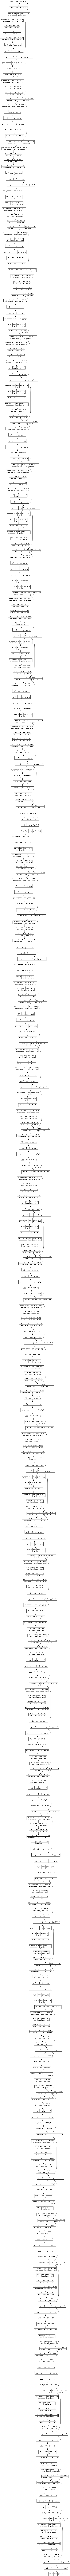

In [18]:
plot_model(model, to_file='densenet121.png', show_shapes=True, show_layer_names=True)


# DenseNet201

In [21]:
def densenet201(img_shape, n_classes, f=32):
    repetitions = (6, 12, 48, 32)

    def bn_rl_conv(x, f, k=1, s=1, p="same"):
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(f, k, strides=s, padding=p)(x)
        return x

    def dense_block(tensor, r):
        for _ in range(r):
            x = bn_rl_conv(tensor, 4 * f)
            x = bn_rl_conv(x, f, 3)
            tensor = Concatenate()([tensor, x])
        return tensor

    def transition_block(x):
        x = bn_rl_conv(x, K.int_shape(x)[-1] // 2)
        x = AvgPool2D(2, strides=2, padding="same")(x)
        return x

    input = Input(img_shape)

    x = Conv2D(64, 7, strides=2, padding="same")(input)
    x = MaxPool2D(3, strides=2, padding="same")(x)

    for r in repetitions:
        d = dense_block(x, r)
        x = transition_block(d)

    x = GlobalAvgPool2D()(d)

    output = Dense(n_classes, activation="softmax")(x)

    model = Model(input, output)
    return model

model = densenet201(input_shape, n_classes)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_173 (Conv2D)         (None, 112, 112, 64)         9472      ['input_7[0][0]']             
                                                                                                  
 max_pooling2d_17 (MaxPooli  (None, 56, 56, 64)           0         ['conv2d_173[0][0]']          
 ng2D)                                                                                            
                                                                                                  
 batch_normalization_138 (B  (None, 56, 56, 64)           256       ['max_pooling2d_17[0][0]

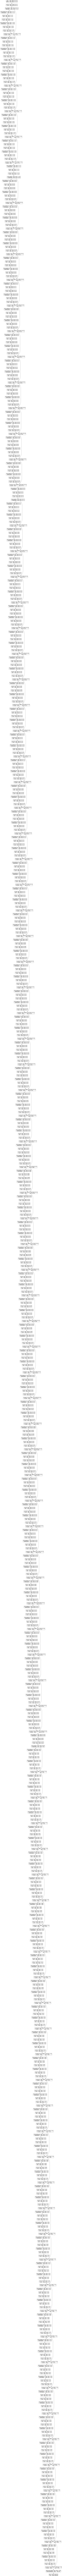

In [22]:
plot_model(model, to_file='densenet201.png', show_shapes=True, show_layer_names=True)

# ResNet50

In [23]:
def resnet50(input_shape, n_classes):
    def identity_block(input_tensor, filters):
        """Identity block"""
        filters1, filters2, filters3 = filters

        x = Conv2D(filters1, (1, 1))(input_tensor)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(filters2, (3, 3), padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(filters3, (1, 1))(x)
        x = BatchNormalization()(x)

        x = Add()([x, input_tensor])
        x = Activation('relu')(x)

        return x

    def convolutional_block(input_tensor, filters, strides=(2, 2)):
        """Convolutional block"""
        filters1, filters2, filters3 = filters

        x = Conv2D(filters1, (1, 1), strides=strides)(input_tensor)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(filters2, (3, 3), padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(filters3, (1, 1))(x)
        x = BatchNormalization()(x)

        shortcut = Conv2D(filters3, (1, 1), strides=strides)(input_tensor)
        shortcut = BatchNormalization()(shortcut)

        x = Add()([x, shortcut])
        x = Activation('relu')(x)

        return x

    input = Input(input_shape)

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool2D((3, 3), strides=(2, 2), padding='same')(x)

    x = convolutional_block(x, [64, 64, 256], strides=(1, 1))
    x = identity_block(x, [64, 64, 256])
    x = identity_block(x, [64, 64, 256])

    x = convolutional_block(x, [128, 128, 512])
    x = identity_block(x, [128, 128, 512])
    x = identity_block(x, [128, 128, 512])
    x = identity_block(x, [128, 128, 512])

    x = convolutional_block(x, [256, 256, 1024])
    x = identity_block(x, [256, 256, 1024])
    x = identity_block(x, [256, 256, 1024])
    x = identity_block(x, [256, 256, 1024])
    x = identity_block(x, [256, 256, 1024])
    x = identity_block(x, [256, 256, 1024])

    x = convolutional_block(x, [512, 512, 2048])
    x = identity_block(x, [512, 512, 2048])
    x = identity_block(x, [512, 512, 2048])

    x = AvgPool2D((7, 7))(x)
    x = Flatten()(x)
    
    output = Dense(n_classes, activation='softmax')(x)

    model = Model(input, output)

    return model

model = resnet50(input_shape, n_classes)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_374 (Conv2D)         (None, 112, 112, 64)         9472      ['input_8[0][0]']             
                                                                                                  
 batch_normalization_338 (B  (None, 112, 112, 64)         256       ['conv2d_374[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation (Activation)     (None, 112, 112, 64)         0         ['batch_normalization_33

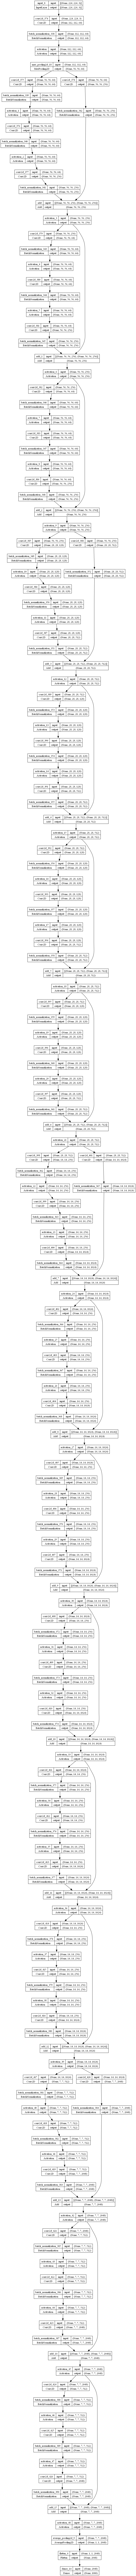

In [24]:
plot_model(model, to_file='resnet50.png', show_shapes=True, show_layer_names=True)


# Inception

In [25]:
def googlenet(input_shape, n_classes):
    def inception_block(x, f):
        t1 = Conv2D(f[0], 1, activation="relu")(x)

        t2 = Conv2D(f[1], 1, activation="relu")(x)
        t2 = Conv2D(f[2], 3, padding="same", activation="relu")(t2)

        t3 = Conv2D(f[3], 1, activation="relu")(x)
        t3 = Conv2D(f[4], 5, padding="same", activation="relu")(t3)

        t4 = MaxPool2D(3, 1, padding="same")(x)
        t4 = Conv2D(f[5], 1, activation="relu")(t4)

        output = Concatenate()([t1, t2, t3, t4])
        return output

    input = Input(input_shape)

    x = Conv2D(64, 7, strides=2, padding="same", activation="relu")(input)
    x = MaxPool2D(3, strides=2, padding="same")(x)

    x = Conv2D(64, 1, activation="relu")(x)
    x = Conv2D(192, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(3, strides=2)(x)

    x = inception_block(x, [64, 96, 128, 16, 32, 32])
    x = inception_block(x, [128, 128, 192, 32, 96, 64])
    x = MaxPool2D(3, strides=2, padding="same")(x)

    x = inception_block(x, [192, 96, 208, 16, 48, 64])
    x = inception_block(x, [160, 112, 224, 24, 64, 64])
    x = inception_block(x, [128, 128, 256, 24, 64, 64])
    x = inception_block(x, [112, 144, 288, 32, 64, 64])
    x = inception_block(x, [256, 160, 320, 32, 128, 128])
    x = MaxPool2D(3, strides=2, padding="same")(x)

    x = inception_block(x, [256, 160, 320, 32, 128, 128])
    x = inception_block(x, [384, 192, 384, 48, 128, 128])

    x = AvgPool2D(7, strides=1)(x)
    x = Dropout(0.4)(x)

    x = Flatten()(x)
    output = Dense(n_classes, activation="softmax")(x)

    model = Model(input, output)
    return model

model = googlenet(input_shape, n_classes)
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_427 (Conv2D)         (None, 112, 112, 64)         9472      ['input_9[0][0]']             
                                                                                                  
 max_pooling2d_19 (MaxPooli  (None, 56, 56, 64)           0         ['conv2d_427[0][0]']          
 ng2D)                                                                                            
                                                                                                  
 conv2d_428 (Conv2D)         (None, 56, 56, 64)           4160      ['max_pooling2d_19[0][0]

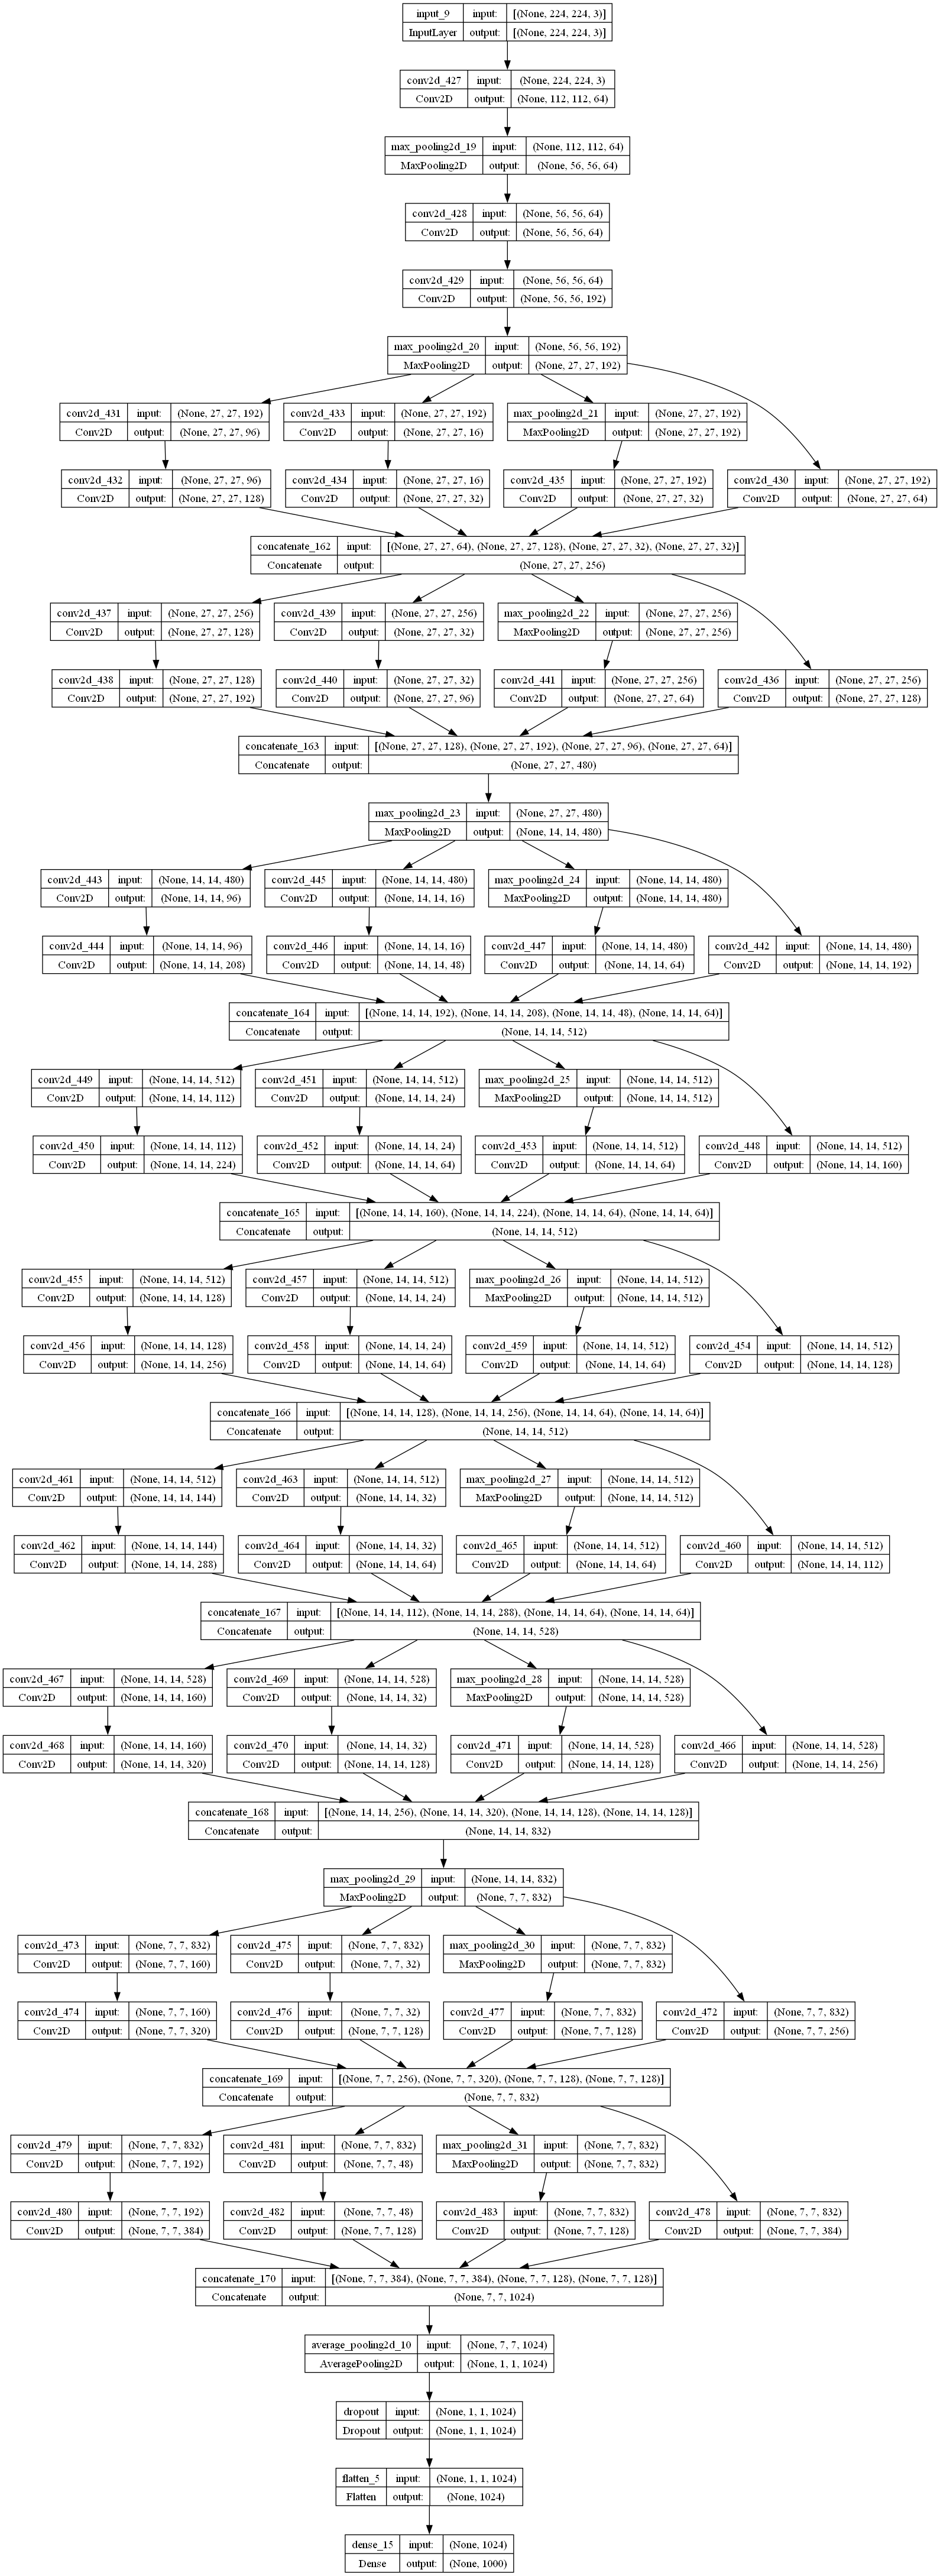

In [26]:
plot_model(model, to_file='inception.png', show_shapes=True, show_layer_names=True)

# MobileNet

In [27]:
def mobilenet(input_shape, n_classes):
    def mobilenet_block(x, f, s=1):
        x = DepthwiseConv2D(3, strides=s, padding="same")(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)

        x = Conv2D(f, 1, strides=1, padding="same")(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        return x

    input = Input(input_shape)

    x = Conv2D(32, 3, strides=2, padding="same")(input)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = mobilenet_block(x, 64)
    x = mobilenet_block(x, 128, 2)
    x = mobilenet_block(x, 128)

    x = mobilenet_block(x, 256, 2)
    x = mobilenet_block(x, 256)

    x = mobilenet_block(x, 512, 2)
    for _ in range(5):
        x = mobilenet_block(x, 512)

    x = mobilenet_block(x, 1024, 2)
    x = mobilenet_block(x, 1024)

    x = GlobalAvgPool2D()(x)

    output = Dense(n_classes, activation="softmax")(x)

    model = Model(input, output)
    return model

model = mobilenet(input_shape, n_classes)
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_484 (Conv2D)         (None, 112, 112, 32)      896       
                                                                 
 batch_normalization_391 (B  (None, 112, 112, 32)      128       
 atchNormalization)                                              
                                                                 
 re_lu_332 (ReLU)            (None, 112, 112, 32)      0         
                                                                 
 depthwise_conv2d (Depthwis  (None, 112, 112, 32)      320       
 eConv2D)                                                        
                                                                 
 batch_normalization_392 (B  (None, 112, 112, 32)      128 

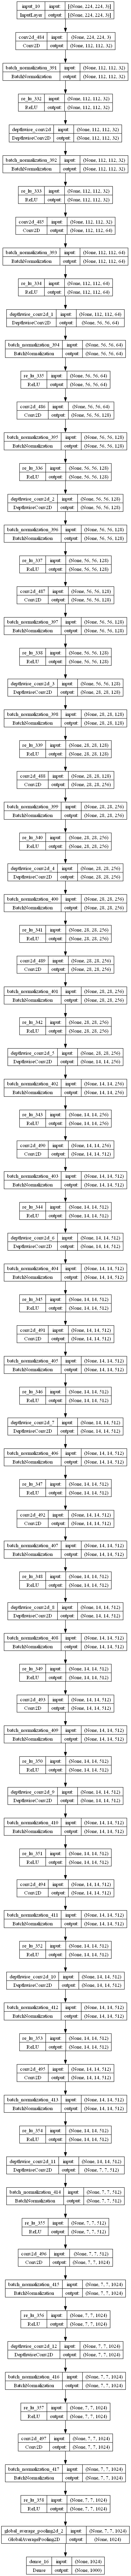

In [28]:
plot_model(model, to_file='mobilenet.png', show_shapes=True, show_layer_names=True)


# Xception

In [29]:
def xception(input_shape, n_classes):
    def conv_bn(x, f, k, s=1, p="same"):
        x = Conv2D(f, k, strides=s, padding=p, use_bias=False)(x)
        x = BatchNormalization()(x)
        return x

    def sep_bn(x, f, k, s=1, p="same"):
        x = SeparableConv2D(f, k, strides=s, padding=p, use_bias=False)(x)
        x = BatchNormalization()(x)
        return x

    def entry_flow(x):
        x = conv_bn(x, 32, 3, 2)
        x = ReLU()(x)
        x = conv_bn(x, 64, 3)
        tensor = ReLU()(x)

        x = sep_bn(tensor, 128, 3)
        x = ReLU()(x)
        x = sep_bn(x, 128, 3)
        x = MaxPool2D(3, strides=2, padding="same")(x)

        tensor = conv_bn(tensor, 128, 1, 2)

        x = Add()([tensor, x])
        x = ReLU()(x)
        x = sep_bn(x, 256, 3)
        x = ReLU()(x)
        x = sep_bn(x, 256, 3)
        x = MaxPool2D(3, strides=2, padding="same")(x)

        tensor = conv_bn(tensor, 256, 1, 2)

        x = Add()([tensor, x])
        x = ReLU()(x)
        x = sep_bn(x, 728, 3)
        x = ReLU()(x)
        x = sep_bn(x, 728, 3)
        x = MaxPool2D(3, strides=2, padding="same")(x)

        tensor = conv_bn(tensor, 728, 1, 2)
        x = Add()([tensor, x])

        return x

    def middle_flow(tensor):
        for _ in range(8):
            x = ReLU()(tensor)
            x = sep_bn(x, 728, 3)
            x = ReLU()(x)
            x = sep_bn(x, 728, 3)
            x = ReLU()(x)
            x = sep_bn(x, 728, 3)

            tensor = Add()([tensor, x])

        return tensor

    def exit_flow(tensor):
        x = ReLU()(tensor)
        x = sep_bn(x, 728, 3)
        x = ReLU()(x)
        x = sep_bn(x, 1024, 3)
        x = MaxPool2D(3, strides=2, padding="same")(x)

        tensor = conv_bn(tensor, 1024, 1, 2)

        x = Add()([tensor, x])
        x = sep_bn(x, 1536, 3)
        x = ReLU()(x)
        x = sep_bn(x, 2048, 3)
        x = ReLU()(x)
        x = GlobalAvgPool2D()(x)
        x = Dense(n_classes, activation="softmax")(x)

        return x

    input = Input(input_shape)

    x = entry_flow(input)
    x = middle_flow(x)
    output = exit_flow(x)

    model = Model(input, output)

    return model

model = xception(input_shape, n_classes)
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_498 (Conv2D)         (None, 112, 112, 32)         864       ['input_11[0][0]']            
                                                                                                  
 batch_normalization_418 (B  (None, 112, 112, 32)         128       ['conv2d_498[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 re_lu_359 (ReLU)            (None, 112, 112, 32)         0         ['batch_normalization_41

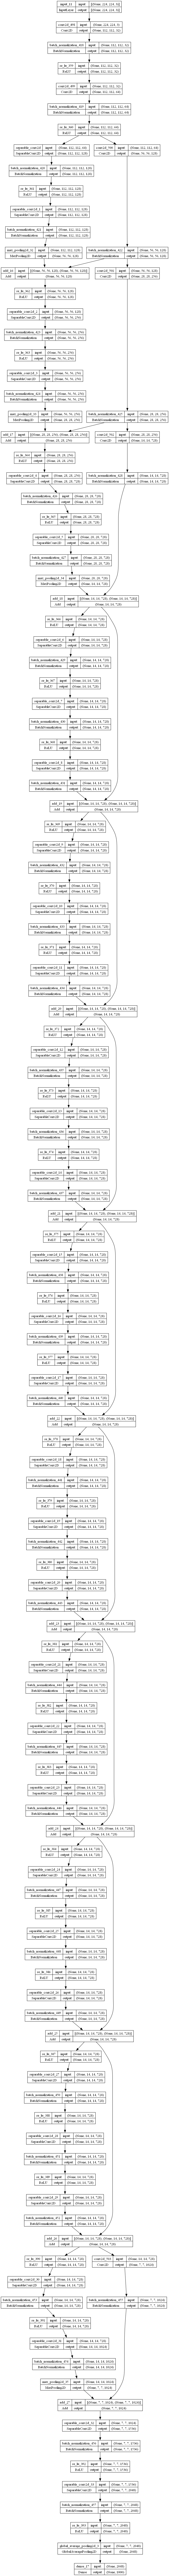

In [30]:
plot_model(model, to_file='xception.png', show_shapes=True, show_layer_names=True)


# YOLO

In [31]:
def yolo(input_shape=(448, 448, 3), n_outputs=30):
    activation = LeakyReLU(0.1)

    def conv_1_3(x, f1, f2, r=1):
        for _ in range(r):
            x = Conv2D(f1, 1, padding="same", activation=activation)(x)
            x = Conv2D(f2, 3, padding="same", activation=activation)(x)
        return x

    input = Input(input_shape)

    x = Conv2D(64, 7, strides=2, padding="same", activation=activation)(input)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(192, 3, padding="same", activation=activation)(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = conv_1_3(x, 128, 256)
    x = conv_1_3(x, 256, 512)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = conv_1_3(x, 256, 512, 4)
    x = conv_1_3(x, 512, 1024)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = conv_1_3(x, 512, 1024, 2)
    x = Conv2D(1024, 3, padding="same", activation=activation)(x)
    x = Conv2D(1024, 3, strides=2, padding="same", activation=activation)(x)

    x = Conv2D(1024, 3, padding="same", activation=activation)(x)
    x = Conv2D(1024, 3, padding="same", activation=activation)(x)

    x = Dense(4096, activation=activation)(x)
    output = Dense(n_outputs)(x)

    model = Model(input, output)
    return model

model = yolo(input_shape, n_classes)
model.summary()


Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_504 (Conv2D)         (None, 112, 112, 64)      9472      
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_505 (Conv2D)         (None, 56, 56, 192)       110784    
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 28, 28, 192)       0         
 ng2D)                                                           
                                                                 
 conv2d_506 (Conv2D)         (None, 28, 28, 128)       247

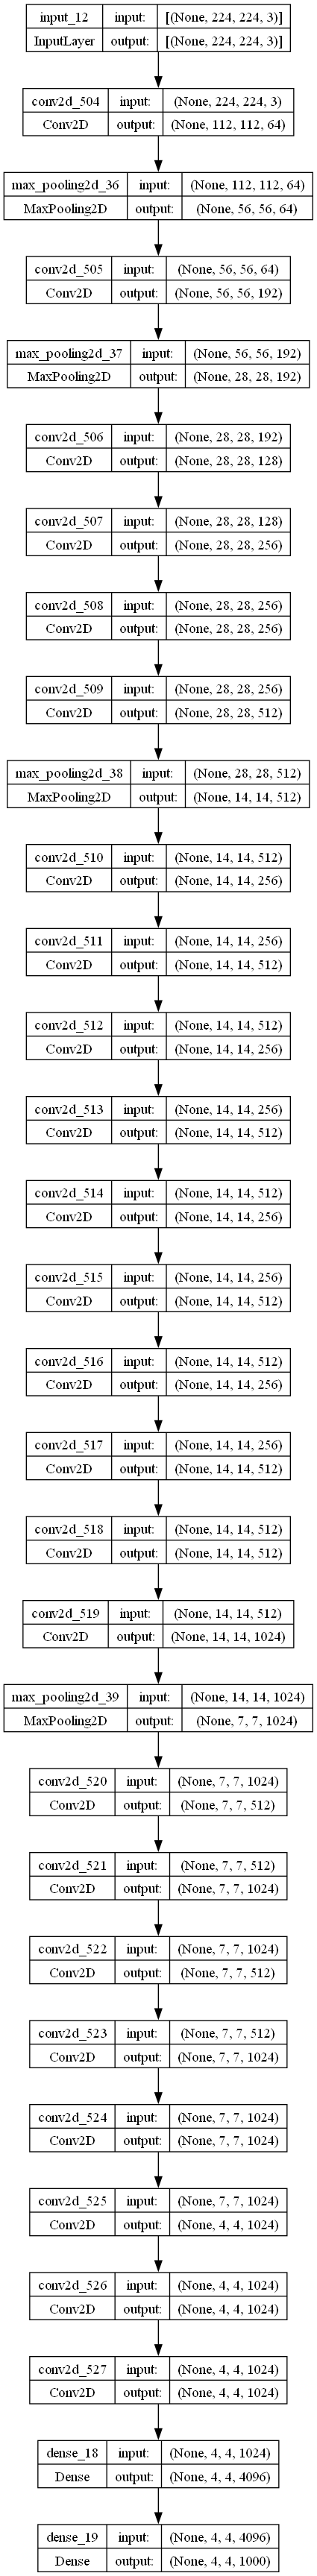

In [32]:
plot_model(model, to_file='yolo.png', show_shapes=True, show_layer_names=True)
